# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

Respuesta:(a)

In [54]:
#Para representar las funciones utilice sympy, la cual me deja declarar funciones y simbolos
#ademas de representarlos en latex. 
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import * 
import sympy as sym

x = sym.Symbol('x')
y = sym.Function('y')
z = sym.Function('z')
w = sym.Function('w')

print("La respuesta es 1.a es:")
y = sin(x)
z = cos(x)
w = 1/(z+sin(2*x))

La respuesta es 1.a es:


Respuesta:(b)

In [55]:
#En esta parte utilice la funcion diff, la cual recibe como argumento una funcion
#y el simbolo x. De modo que la funcion es derivada respecto a este simbolo. 
g = sym.Function('g')
g = y*z

aux = diff(g,x)
print("La respuesta es 1.b es:")
aux

La respuesta es 1.b es:


Respuesta:(c)

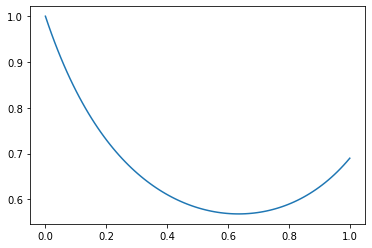

In [69]:
#Aqui utilizo matplotlib, la X define un vector, el cual va a ser mi eje y el rango
#donde quiero ver la funcion, en este caso es de [0,1]. En y declaro la funcion la cual
#depende de los valores del vector X. Y por ultimo utilice la funcion de matplotlib, plot, 
#la cual genera una gracia sencilla, dandole ambos ejes.
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0,1,100, endpoint=True)
Y = 1/(np.cos(X) + np.sin(2*X))
plt.plot(X,Y);

Respuesta:(d)

In [76]:
#Aqui utilice la funcion integrate, la cual requiere de una funcion y como segundo argumento
#tengo un arrego de 3, en el cual tengo el simbolo y los dos argumentos que le siguen
#son los valores de integración a evaluar
sol = integrate(y,(x, 0, 1))
print("La respuesta es 1.d es:")
sol.evalf()

La respuesta es 1.d es:


Respuesta:(e)

In [115]:
#Para obtener los límites utilice la funcion limit,la cual tiene como primer argumento
#la funcion a evaluar el limite, como segundo argumento el simbolo y por ultimo
#el valor al que tiende el simbolo. Aplica para los limites de y,z,w,g
l_y = limit(y,x,0) 
l_z = limit(z,x,0)
l_w = limit(w,x,0)
l_g = limit(g,x,0)
print("La respuesta es 1.d es: Lim y,Lim z, Lim w, Lim g todas con x -> 0")
print(l_y,l_z,l_w,l_g)

La respuesta es 1.d es: Lim y,Lim z, Lim w, Lim g todas con x -> 0
0 1 1 0


Respuesta:(f)

In [118]:
#Para obtener la serie extendida, utilice la funcion series, la cual tiene como argumentos
#el simbolo, el 0 en este caso esta indicando que este simbolo no va a tomar ningun valor
#el otro argumento es el numero de factores hasta los que tengo que llegar. Aplica para la serie de cos y sin
serie_sin = sin(x).series(x,0,6) 
serie_cos = cos(x).series(x,0,6)


La respuesta es 1.d es:


<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

Respuesta:(a)

In [134]:
#Esto es la respuesta A
import numpy as np
import matplotlib.pyplot as plt
N = 100
tiempo_in = 0.0
tiempo_fin = 40.0
tau = 4.0
dt = tau/(float)(N-1) 
t = np.linspace(0, tau, num=N)
y = np.zeros([N,3])
estado = np.array([x,y,z])
a=0.13
b=0.2
c=6.5
y[0,0] = 0.0
y[0,1] = 0.0
y[0,2] = 0.0
class atractor:
    
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def fun_x(self):
        return self.trajectory[:,0]
    
    def fun_y(self):
        return self.trajectory[:,1]
    def fun_z(self):
        return self.trajectory[:,2]
    
    def plot(self):
        fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

        ax[0].plot(self.tau, self.fun_x(), label="Funcion x", color="blue")
        ax[1].plot(self.tau, self.fun_y(), label="Funcion y", color="green")
        ax[2].plot(self.tau, self.fun_z(), label="Funcion z", color="red")

        ax[0].set_ylabel("Funcion x")
        ax[0].set_xlabel("tiempo (s)")

        ax[0].set_ylabel("Funcion y")
        ax[0].set_xlabel("tiempo (s)")

        ax[0].set_ylabel("Funcion z")
        ax[0].set_xlabel("tiempo (s)")
    
    def initial_conditions(self, x_i, y_i, z_i):
        self.x_i = x_i
        self.y_i = y_i
        self.z_i = z_i
        
    def dynamics(self, state, t):
        g0 = -estado[1] -estado[2]
        g1 = estado[0] + a*estado[1]
        g2 = b + estado[2]*(estado[0]-c)
        return np.array([g0, g1, g2])
        
    def integrate(self, num_steps, t_i, t_f, method):
        
        self.tau, self.dt = np.linspace(t_i, t_f, num=num_steps, retstep=True)
        self.trajectory = np.zeros([num_steps, 3])
        self.trajectory[0,0] = self.x_i
        self.trajectory[0,1] = self.y_i
        self.trajectory[0,2] = self.z_i
        
        for j in range(N-1):
            self.trajectory[j+1] = method(self.trajectory[j], self.tau[j], self.dt, self.dynamics)        

def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

res = atractor(a,b,c)
res.initial_conditions(0,0,0)
N = 100
tiempo_inicial = 0.0
tiempo_final = 100.0
res.integrate(N,tiempo_inicial,tiempo_final,RK2)

#Esto deberia ser la respuesta B PERO no me corrio el A :(
res.plot()


<ipython-input-134-51d0cf8a5b64>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  estado = np.array([x,y,z])
<ipython-input-134-51d0cf8a5b64>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([g0, g1, g2])


ValueError: setting an array element with a sequence.